19. A social network dataset is a categorical dataset to determine whether a user purchased a particular product
based on gender, age and estimated salary.
Objectives:
i. Understand the Dataset & cleanup (if required).
ii. Use a SVM to classify whether a user purchased a car or not? (Use Linear Kernel)
iii. Create a confusion matrix and evaluate the model using accuracy 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [2]:
df = pd.read_csv("dataset/Social_Network_Ads/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# Check for missing values
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [ ]:
# Drop missing values if necessary
df.dropna(inplace=True)

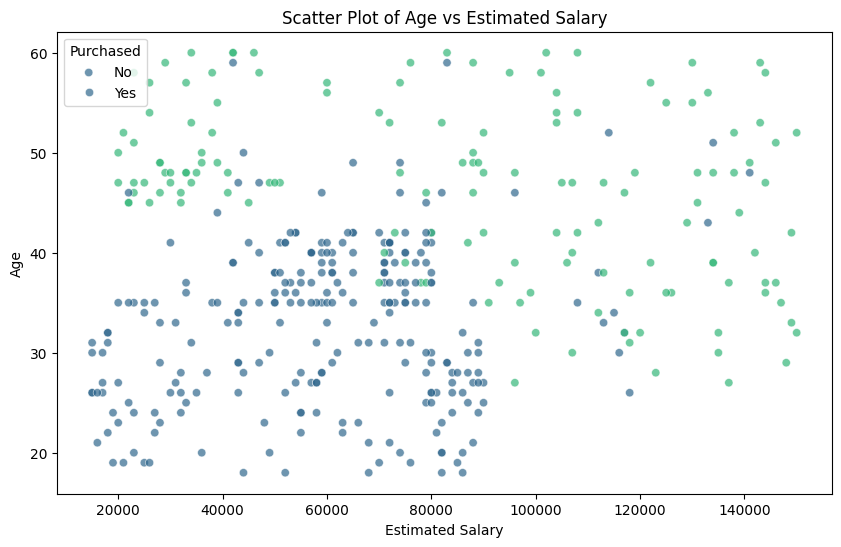

In [10]:
plt.figure(figsize=(10, 6))
snb.scatterplot(data=df, x="EstimatedSalary", y="Age", hue="Purchased", palette="viridis", alpha=0.7)
plt.title("Scatter Plot of Age vs Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Age")
plt.legend(title='Purchased', loc="upper left", labels=['No', 'Yes'])
plt.show()

In [12]:
# Encoding categorical data
df['Gender'] = pd.factorize(df['Gender'])[0]

# Features and target variable
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train SVM model

svm_classifier_linear = SVC(kernel='linear')
svm_classifier_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = svm_classifier_linear.predict(X_test)

In [16]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[48  4]
 [ 9 19]]


In [17]:
accuracy = accuracy_score(y_test, y_pred)

In [18]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84
Recall: 0.68
Precision: 0.83
F1 Score: 0.75
